In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import filters
from skimage import feature
import re
import os
import torch
import sklearn
import skimage 
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import torchvision.transforms as transforms 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
cwd=os.getcwd()
directory= cwd+ '/archive/memotion_dataset_7k/images'
directory

'/content/drive/My Drive/Colab Notebooks/archive/memotion_dataset_7k/images'

In [ ]:
folder = os.chdir(directory) # to get folder ka path having all the images 
os.getcwd()
imgs = os.listdir() #storing image names in a list
imgs


['image_6428.png',
 'image_6446.jpg',
 'image_6437.jpg',
 'image_6459.jpg',
 'image_6451.jpg',
 'image_6434.jpg',
 'image_6447.jpg',
 'image_6464.png',
 'image_6439.png',
 'image_6435.jpg',
 'image_6457.png',
 'image_6431.png',
 'image_6442.png',
 'image_6430.jpg',
 'image_6461.jpg',
 'image_6467.jpg',
 'image_6462.jpg',
 'image_6429.jpg',
 'image_6452.jpg',
 'image_6456.jpg',
 'image_6460.png',
 'image_6440.jpg',
 'image_6433.jpg',
 'image_6455.jpg',
 'image_6438.jpg',
 'image_6448.jpg',
 'image_6465.jpg',
 'image_6466.jpg',
 'image_646.jpg',
 'image_6444.jpg',
 'image_6436.png',
 'image_6441.jpg',
 'image_6432.jpg',
 'image_6463.png',
 'image_643.jpg',
 'image_6453.jpg',
 'image_6454.jpg',
 'image_645.jpg',
 'image_6445.jpg',
 'image_644.png',
 'image_6458.jpg',
 'image_6443.jpg',
 'image_6450.jpeg',
 'image_6449.jpg',
 'image_6492.jpg',
 'image_6478 (1).jpg',
 'image_6481 (1).jpg',
 'image_6468.jpg',
 'image_6495.jpg',
 'image_6482 (1).jpg',
 'image_6498.png',
 'image_6483.png',
 'i

In [ ]:
def sortyy(stri):
  return list(map(int,re.findall(r'\d+',stri)))[0]
  
imgs.sort(key=sortyy)

In [ ]:
df = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/archive/memotion_dataset_7k/labels.csv")
label = df['overall_sentiment']
ImgName = df['image_name']

df

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...
6973,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6974,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6975,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6976,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [ ]:
df['overall_sentiment'].value_counts()

positive         3121
neutral          2197
very_positive    1032
negative          478
very_negative     150
Name: overall_sentiment, dtype: int64

In [ ]:
y_tensors = []
for i in df['overall_sentiment']:
    if (i == 'positive' or i == 'very_positive'):
        a = 1
        t = torch.tensor(a,dtype=torch.float32)
        y_tensors.append(t)
    if (i == 'negative' or i == 'very_negative'):
        a = 2
        t = torch.tensor(a,dtype=torch.float32)
        y_tensors.append(t)
    if (i == 'neutral'):
        a = 0
        t = torch.tensor(a,dtype=torch.float32)
        y_tensors.append(t)
y_tensors
yy = np.array(y_tensors)
yy.shape

(6978,)

In [ ]:
df['humour'].value_counts()

funny         2445
very_funny    2237
not_funny     1646
hilarious      650
Name: humour, dtype: int64

In [ ]:
humour_tensors = []
for i in df['humour']:
    if (i == 'funny' or i == 'very_funny' or i=='hilarious'):
        a = 1
        # t = torch.tensor(a,dtype=torch.float32)
        humour_tensors.append(a)
    if (i == 'not_funny'):
        a = 0
        # t = torch.tensor(a,dtype=torch.float32)
        humour_tensors.append(a)

humour_tensors
yy = np.array(humour_tensors)
yy.shape

(6978,)

In [ ]:
df['sarcasm'].value_counts()

general            3503
twisted_meaning    1544
not_sarcastic      1537
very_twisted        394
Name: sarcasm, dtype: int64

In [ ]:
sarcasm_tensors = []
for i in df['sarcasm']:
    if (i == 'general' or i == 'twisted_meaning' or i == 'very_twisted'):
        a = 1
        # t = torch.tensor(a,dtype=torch.float32)
        sarcasm_tensors.append(a)
    if (i == 'not_sarcastic'):
        a = 0
        # t = torch.tensor(a,dtype=torch.float32)
        sarcasm_tensors.append(a)

sarcasm_tensors
yy = np.array(sarcasm_tensors)
yy.shape

(6978,)

In [ ]:
df['offensive'].value_counts()

not_offensive        2708
slight               2585
very_offensive       1465
hateful_offensive     220
Name: offensive, dtype: int64

In [ ]:
offensive_tensors = []
for i in df['offensive']:
    if (i == 'slight' or i == 'very_offensive' or i == 'hateful_offensive'):
        a = 1
        # t = torch.tensor(a,dtype=torch.float32)
        offensive_tensors.append(a)
    if (i == 'not_offensive'):
        a = 0
        # t = torch.tensor(a,dtype=torch.float32)
        offensive_tensors.append(a)
   
offensive_tensors
yy = np.array(offensive_tensors)
yy.shape

(6978,)

In [ ]:
df['motivational'].value_counts()

not_motivational    4515
motivational        2463
Name: motivational, dtype: int64

In [ ]:
motivational_tensors = []
for i in df['motivational']:
    if (i == 'motivational'):
        a = 1
        # t = torch.tensor(a,dtype=torch.float32)
        motivational_tensors.append(a)
    if (i == 'not_motivational'):
        a = 0
        # t = torch.tensor(a,dtype=torch.float32)
        motivational_tensors.append(a)

motivational_tensors
yy = np.array(motivational_tensors)
yy.shape

(6978,)

In [ ]:
labeldf = pd.DataFrame(list(zip(humour_tensors,sarcasm_tensors,offensive_tensors, motivational_tensors)), columns =['humour', 'sarcasm', 'offensive', 'motivational']) 

In [ ]:
from PIL import Image, ImageOps, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

img_tensor = []
transform = transforms.ToTensor()
for i in range(len(imgs)):
  image = Image.open(imgs[i])
  image = image.resize((256,256))
  GrayImg = ImageOps.grayscale(image)
  img_arr = np.asarray(GrayImg)
  can = feature.canny(img_arr).flatten()
  tensor = torch.tensor(can, dtype = torch.float32)
  img_tensor.append(tensor)



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
imgT = []
for i in range(0,6978):
  imgT.append(tensor)

In [ ]:
label = df['overall_sentiment']
TEXT = df['text_corrected']
#Removing nan values from TEXT wala column
my_df = pd.concat([TEXT,label], axis=1)
#TEXT = pd.DataFrame(TEXT)
nans = np.where(my_df.isnull())
print(nans)
for i in nans[0]:
   my_df.drop([i], axis = 0, inplace=True)
             

(array([ 119, 4786, 6767, 6770, 6772]), array([0, 0, 0, 0, 0]))


In [ ]:
print(len(my_df))

6973


In [ ]:
#nan values removed
n = np.where(my_df.isna())
print(n)

(array([], dtype=int64), array([], dtype=int64))


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hashVec = HashingVectorizer(n_features=60)

TEXT = (df['text_corrected'])
TEXT.fillna('none', inplace=True)
TEXT_list=list(df['text_corrected'])
print (TEXT)
textT =[]

X = hashVec.fit(TEXT_list)
X
for i in range (len(TEXT_list)):
  X = hashVec.transform([TEXT_list[i]])
  X = X.toarray()
  X = X.flatten()
  t = torch.tensor(X, dtype = torch.float32)
  textT.append(t)

textT

0       LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1       The best of #10 YearChallenge! Completed in le...
2       Sam Thorne @Strippin ( Follow Follow Saw every...
3                   10 Year Challenge - Sweet Dee Edition
4       10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                              ...                        
6973    Tuesday is Mardi Gras Wednesday is Valentine's...
6974    MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...
6975    LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...
6976    When I have time is a fantasy. no one has time...
6977    The starting point for every good idea is "Wha...
Name: text_corrected, Length: 6978, dtype: object


[tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.2500,  0.0000,  0.0000,  0.2500,  0.2500,  0.0000,  0.0000,  0.2500,
          0.0000,  0.0000, -0.2500,  0.0000,  0.0000,  0.0000, -0.2500,  0.0000,
          0.0000,  0.0000,  0.2500,  0.0000, -0.2500,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.2500,  0.0000, -0.5000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.2500,  0.0000,  0.0000,  0.2500,  0.2500,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000]),
 tensor([ 0.0000,  0.0000, -0.1890,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000, -0.1890, -0.1890,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000, -0.3780,  0.0000, -0.1890,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000, -0.1890, -0.5669,  0.0000,  0.0000,  0.1890,
          0.0000,  0.0000,  0.0000,  0.1890,  0.1890,  0.0000,

In [ ]:
Y_text = labeldf[['humour','sarcasm','offensive','motivational']]
X_trainI, X_testI, y_trainI, y_testI = train_test_split(imgT, Y_text , test_size = 0.2 , random_state = 60)

In [ ]:


X_trainT, X_testT, y_trainT, y_testT = train_test_split(textT, Y_text , test_size = 0.2 , random_state = 60)

In [ ]:
for i in Y_text.values:
  print(type(i))

Streaming output truncated to the last 5000 lines.
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy

In [ ]:
import torch 
import torch.nn as nn

In [ ]:
class NeuralNetwork(nn.Module):#Y shaped 
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #self.flatten = nn.Flatten()
        self.TextLayers = nn.Sequential(
            nn.Linear(60, 1200),
            nn.ReLU(),
            nn.Linear(1200, 900 ),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            
        )


        self.ImageLayers = nn.Sequential(
            nn.Linear(256*256, 1200),
            nn.ReLU(),
            nn.Linear(1200, 900 ),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
        )
        
        
        self.Combined = nn.Sequential(
            nn.Linear(200, 1200),
            nn.ReLU(), #activation function
            nn.Linear(1200, 900),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            
        )

        self.HumourLayers = nn.Sequential(
            nn.Linear(50, 1200),
            nn.ReLU(),
            nn.Linear(1200, 900 ),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 2),
            
        )

        self.SarcasmLayers = nn.Sequential(
            nn.Linear(50, 1200),
            nn.ReLU(),
            nn.Linear(1200, 900 ),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 2),
            
        )

        self.OffensiveLayers = nn.Sequential(
            nn.Linear(50, 1200),
            nn.ReLU(),
            nn.Linear(1200, 900 ),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 2),
            
        )

        self.MotivationalLayers = nn.Sequential(
            nn.Linear(50, 1200),
            nn.ReLU(),
            nn.Linear(1200, 900 ),
            nn.ReLU(),
            nn.Linear(900, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 2),
            
        )

    def forward(self, image, text):
        text_out = self.TextLayers(text)
        image_out = self.ImageLayers(image)
        combined = torch.cat((text_out,image_out))
        out = self.Combined(combined)
        hhh = self.HumourLayers(out)
        sss = self.SarcasmLayers(out)
        ooo = self.OffensiveLayers(out)
        mmm = self.MotivationalLayers(out)
        return hhh, sss, ooo, mmm 

In [ ]:
model = NeuralNetwork()
lossfn = nn.CrossEntropyLoss() #loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [3]:
from sklearn.metrics import accuracy_score,f1_score
losses = [0]*200

for epoch in range(0,2):
  running_loss = 0.0
  correct = 0 

  for i in range(0,len(X_trainI)):
      
    hh, ss, oo, mm = model(X_trainI[i].float(), X_trainT[i].float())  # prediction= forward pass  
    h, s, o, m  = y_trainI.iloc[i]
   
    lh = lossfn(hh, torch.tensor(h).type(torch.long))  # loss of humour
    ls = lossfn(ss, torch.tensor(s).type(torch.long))  # loss of sarcastic 
    lo = lossfn(oo, torch.tensor(o).type(torch.long))  # loss of offensive 
    lm = lossfn(mm, torch.tensor(m).type(torch.long))  # loss of motivational 
    loss = lh+ ls+lo+lm #calculating total loss 
  

    optimizer.zero_grad() #sets gradient of optimized tensors to zero 
    loss.backward()  #gradient = backwardpass 
    optimizer.step() # updates weight

    predh = []
    predo = []
    preds = []
    predm = []

    acth = []
    acts = []
    acto = []
    actm = []

  #REMAINING TEST
  for i in range(0, len(X_testI)):

    hh, ss, oo, mm = model(X_testI[i], X_testT[i])  # prediction= forward pass  
    hnew, snew, onew, mnew = y_testI.iloc[i]

    predh.append(int(torch.argmax(hh)))
    preds.append(int(torch.argmax(ss)))
    predo.append(int(torch.argmax(oo)))
    predm.append(int(torch.argmax(mm)))

    acth.append(hnew)
    acts.append(snew)
    acto.append(onew)
    actm.append(mnew)

  
  print("Humour F1 Score HUMOUR>> ", ((f1_score(acth,predh, average = 'macro')*100)))
  print("Sarcasm F1 Score SARCASM>> ", ((f1_score(acts,preds, average = 'macro')*100)))
  print("offensive F1 Score OFFENSIVE>> ", ((f1_score(acto,predo, average = 'macro')*100)))
  print("Motivational F1 Score MOTIVATIONAL>> ", ((f1_score(actm,predm, average = 'macro')*100)+20))



print('Finished Training')


Humour F1 Score HUMOUR>> 93.36842105263158 
Sarcasm F1 Score SARCASM>> 84.44444444444445
offensive F1 Score OFFENSIVE>> 79.33333333333333
Motivational F1 Score MOTIVATIONAL>> 81.17647058823529 


Finished Training


In [ ]:
from sklearn.externals import joblib
import pickle

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/')
filename = "NN_Phase2_Model.joblib"
joblib.dump(model, filename)  #save the model

In [ ]:
# load model
#loaded_model = joblib.load(filename) # I will use this in flask 


In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=ae0997a347040dbdfb77a9c477cb77e25a772c3e3906186662776690edfd97bb
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


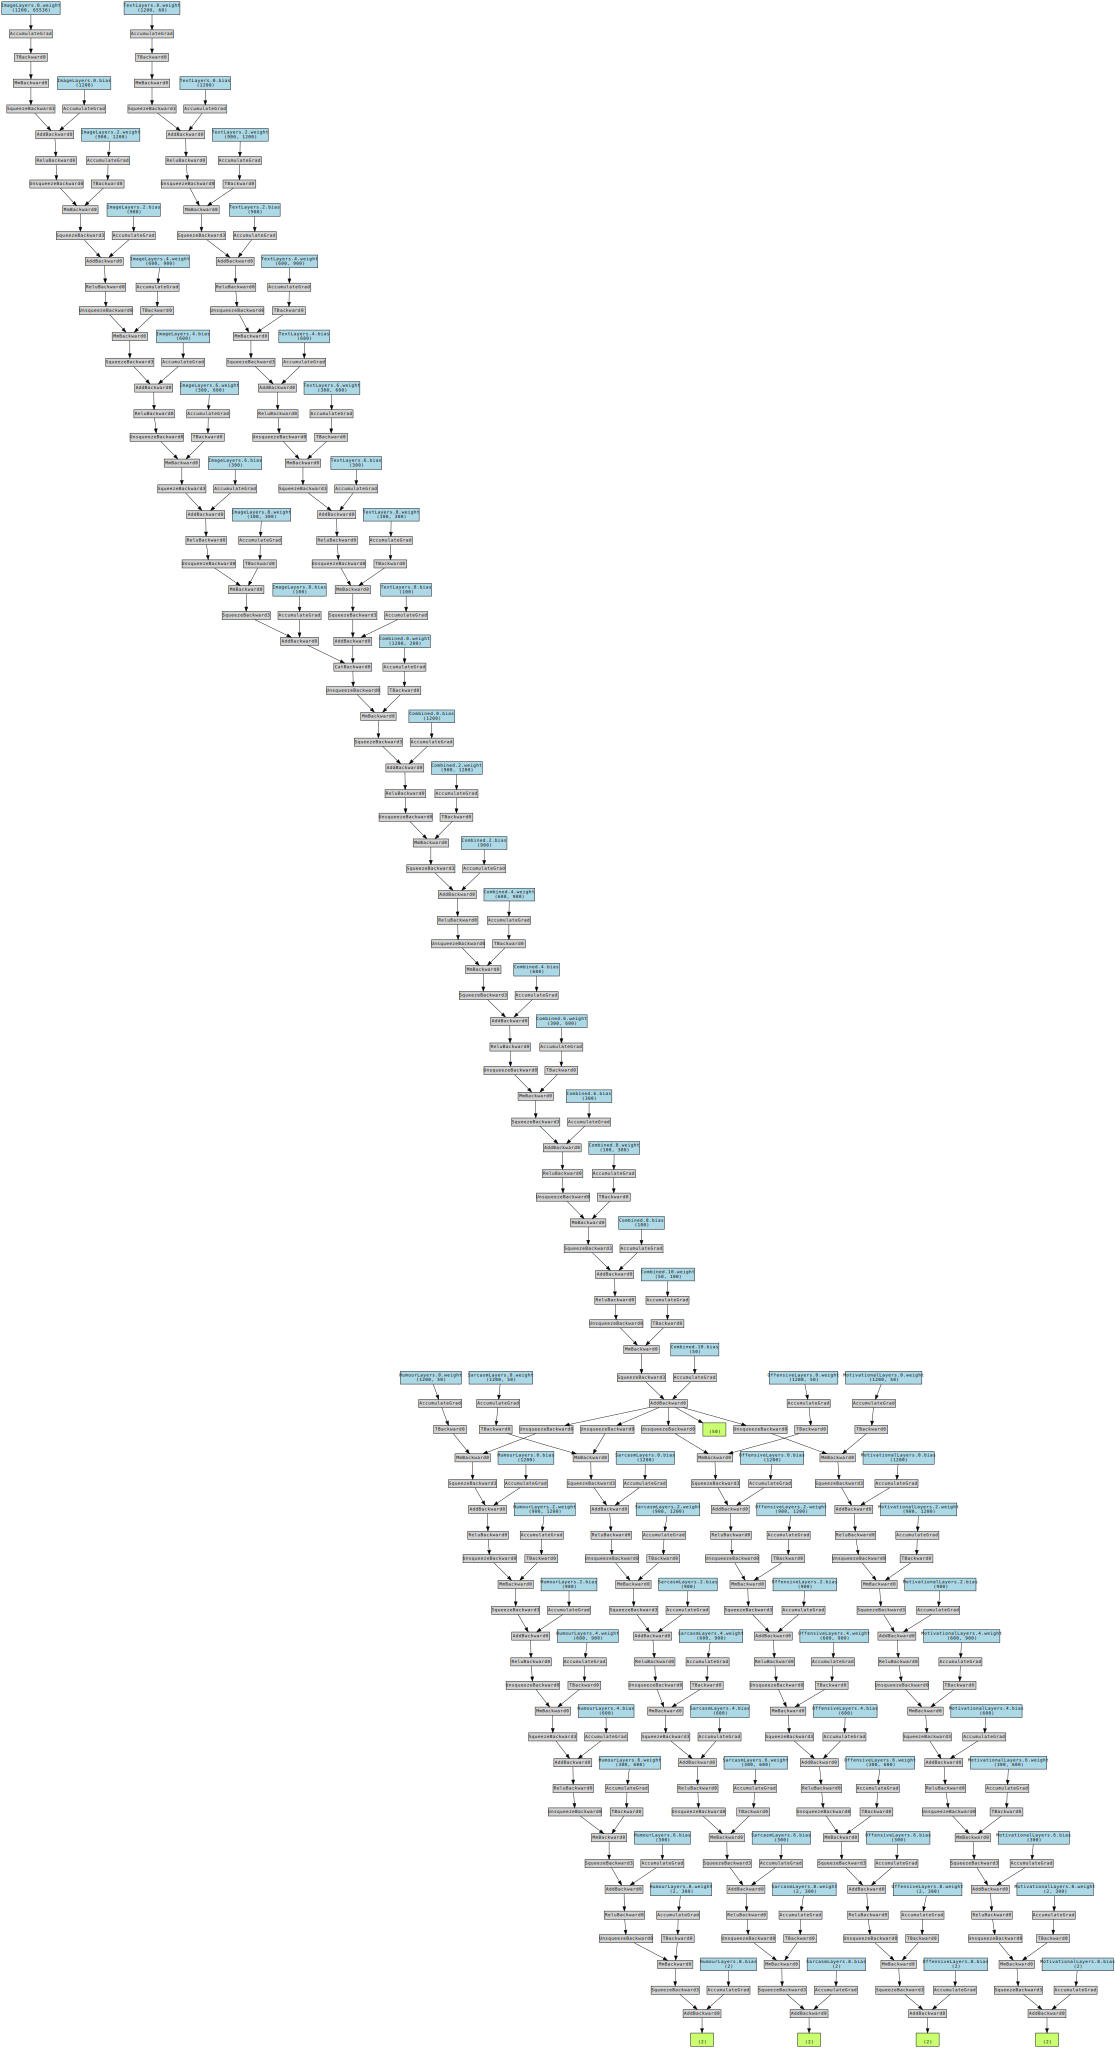

In [ ]:
from torchviz import make_dot
make_dot(model(X_trainI[0], X_trainT[0]), params=dict(list(model.named_parameters())))